# Gerar arquivos GEXF

In [ ]:
import networkx as nx

In [ ]:
g = nx.read_adjlist("../data/facebook_combined.txt.gz",create_using=nx.DiGraph(), nodetype = int)

print(nx.info(g))

In [ ]:
nx.write_gexf(g, 'facebook_combined.gexf')

<hr style="height:2em; border: 6px dashed #999;" />

# Obter parâmetros de simulação

Obtém os parâmetros de simulação, variando os valores de `gamma`, `beta` e `tmax`.

In [119]:
import EoN
import random
import networkx as nx
from tabulate import tabulate
import matplotlib.pyplot as plt

In [120]:
%%time

#G = nx.read_edgelist("../data/facebook_combined.txt.gz", create_using=nx.Graph(), nodetype=int)
#G = nx.read_adjlist("../data/socfb-Bowdoin47.mtx", create_using=nx.DiGraph(), nodetype=int)
G = nx.read_adjlist("../data/socfb-Haverford76.mtx", create_using=nx.DiGraph(), nodetype=int)
#G = nx.read_adjlist("../data/socfb-Simmons81.mtx", create_using=nx.DiGraph(), nodetype=int)

print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 1446
Number of edges: 59589
Average in degree:  41.2095
Average out degree:  41.2095
Wall time: 302 ms


In [121]:
gamma=0.3
beta=0.2
tmax=10

In [122]:
%%time

sim = EoN.fast_SIR(G, tau=beta, gamma=gamma, rho=None, return_full_data=True, tmax=tmax)
summary = sim.summary()

Wall time: 71 ms


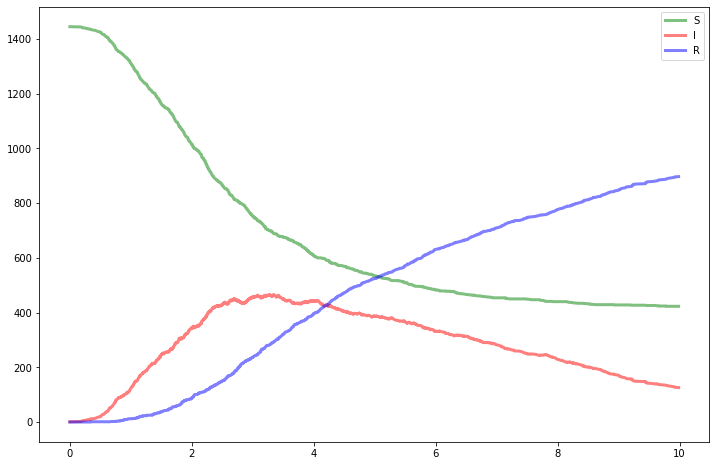

In [123]:
plt.figure(figsize=(12,8))
plt.plot(summary[0], summary[1]['S'], label="S", linewidth=3, color='g', alpha=0.5)
plt.plot(summary[0], summary[1]['I'], label="I", linewidth=3, color='r', alpha=0.5)
plt.plot(summary[0], summary[1]['R'], label="R", linewidth=3, color='b', alpha=0.5)
plt.legend(); plt.show()

### Obtém os nós iniciais infectados

In [118]:
initial_is = [i for i in range(sim.G.number_of_nodes()) if sim.node_status(i, 0) == 'I']

print(f'Quantidade de nós infectados: {len(initial_is)}')
print(f'Listagem de Nós: {initial_is}')

density = nx.density(G)
print("Network density:", density)

Quantidade de nós infectados: 1
Listagem de Nós: [1307]
Network density: 0.02851871527229393


<hr style="height:2em; border: 6px dashed #999;" />

# Network graph

**Summary tuple: ** A pair (t, D) where:
- `t` is a numpy array of times and 
- `D` is a dict whose keys are the possible statuses and whose values

In [15]:
import EoN
import random
import networkx as nx
from tabulate import tabulate
import matplotlib.pyplot as plt

In [16]:
G = nx.gnp_random_graph(500, 0.4)

print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 500
Number of edges: 50061
Average degree: 200.2440


In [32]:
gamma=0.2
beta=1.2
R_0=0.005
tmax=30

sim = EoN.fast_SIR(G, tau=beta, gamma=gamma, rho=R_0, return_full_data=True, tmax=tmax)
summary = sim.summary()

In [33]:
lst = list(summary[1]['I'])
element = max(lst)
idx = lst.index(element)

In [34]:
print(f'{element} - {idx}')

497 - 501


In [35]:
list_numbers = [0, 2, 3, 4, 3, 6, 7, 8, 3, 10]
element = 3
list_numbers.index(element)

2

In [ ]:
summary[1]['I']#[423]

In [ ]:
b = sim.get_statuses(time=30)
last_iteration = {}
for i in range(G.number_of_nodes()):
    last_iteration[i] = b[i]

In [ ]:
last_iteration[4]